## 多元线性回归
---
![](https://github.com/MachineLearning100/100-Days-Of-ML-Code/raw/master/Info-graphs/Day%203.png)

## 数据预处理
### 导入库

In [1]:
import pandas as pd
import numpy as np

### 导入数据集

In [2]:
dataSet = pd.read_csv('../datasets/50_Startups.csv')
dataSet.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
X=dataSet.iloc[:,:-1].values
Y=dataSet.iloc[:,-1].values

### 将特殊数据数字化

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[: , 3] = labelencoder.fit_transform(X[ : , 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

### 躲避虚拟变量陷阱

In [5]:
X = X[: , 1:]

### 拆分数据集为训练集和测试集

In [7]:
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## 在训练集上训练多元线性回归模型

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
y_pred = regressor.predict(X_test)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
x_label = [i for i in range(1,11)]
x_label

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

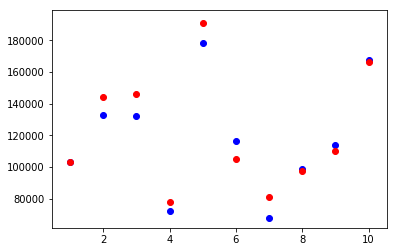

In [19]:
fig=plt.figure(1)
plt.scatter(x_label,y_pred,color='blue')
plt.scatter(x_label,Y_test, color='red')